In [14]:
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")

In [15]:
del data['CUST_ID']

In [16]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### we'll fill null values

In [18]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

In [19]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

## let's apply agglomerative hirachical clustering model

In [20]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


#### After we finished creating our clusters, we can print each point’s corresponding cluster.


In [21]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.describe()

,0
count,8950.000000
mean,0.006480
std,0.119421
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


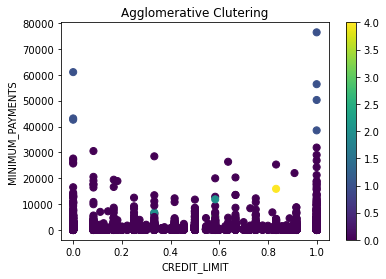

In [27]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data["PURCHASES_FREQUENCY"],  data ["MINIMUM_PAYMENTS"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("CREDIT_LIMIT")
ax.set_ylabel("MINIMUM_PAYMENTS")
plt.colorbar(scatter)

### Dendrogram Example


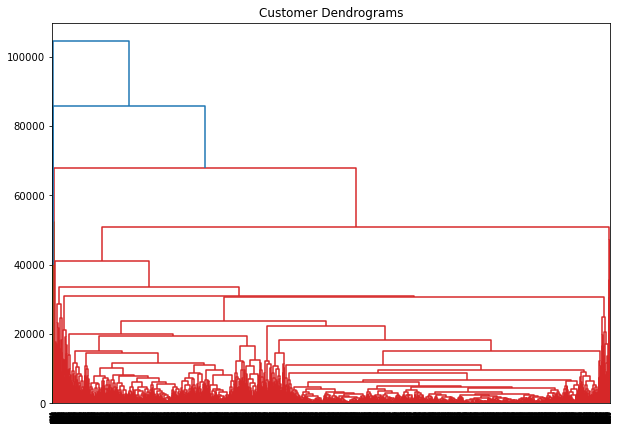

In [22]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

### K-means 

In [31]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)


KMeans(n_clusters=5, random_state=0)

In [39]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [35]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


### KMeans Plot

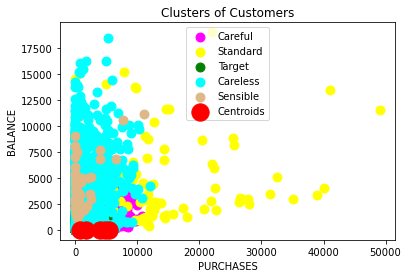

In [51]:
plt.scatter(data["PURCHASES"][labels[0]==0],          
            data["BALANCE"][labels[0]==0],s=80,c='magenta',label='Careful')
plt.scatter(data["PURCHASES"][labels[0] == 1],
           data["BALANCE"][labels[0] == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PURCHASES"][labels[0] == 2],
           data["BALANCE"][labels[0] == 2],s=80,c='green',label='Target')
plt.scatter(data["PURCHASES"][labels[0] == 3], 
           data["BALANCE"][labels[0] == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["PURCHASES"][labels[0] == 4], 
           data["BALANCE"][labels[0] == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show()

In [44]:
data[data["PURCHASES"]<95]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
4,817.714335,1.000000,16.0,16.0,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
14,2772.772734,1.000000,0.0,0.0,0.0,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
16,2072.074354,0.875000,0.0,0.0,0.0,2784.274703,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8
24,5368.571219,1.000000,0.0,0.0,0.0,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8930,229.540018,1.000000,84.0,0.0,84.0,304.951421,1.000000,0.000000,0.833333,0.333333,4,6,1000.0,124.373736,89.753056,0.000000,6
8937,163.001629,0.666667,0.0,0.0,0.0,274.440466,0.000000,0.000000,0.000000,0.166667,3,0,1000.0,117.738787,60.792450,0.000000,6
8938,78.818407,0.500000,0.0,0.0,0.0,1113.186078,0.000000,0.000000,0.000000,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6
8943,5.871712,0.500000,20.9,20.9,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6


In [45]:
data["PURCHASES"]<95

0       False
1        True
2       False
3       False
4        True
        ...  
8945    False
8946    False
8947    False
8948     True
8949    False
Name: PURCHASES, Length: 8950, dtype: bool

### let's find the optimal K

### k=3

In [60]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)


KMeans(n_clusters=3, random_state=0)

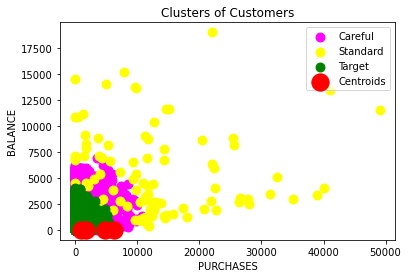

In [65]:
plt.scatter(data["PURCHASES"][labels[0]==0],          
            data["BALANCE"][labels[0]==0],s=80,c='magenta',label='Careful')
plt.scatter(data["PURCHASES"][labels[0] == 1],
           data["BALANCE"][labels[0] == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PURCHASES"][labels[0] == 2],
           data["BALANCE"][labels[0] == 2],s=80,c='green',label='Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show()

### K=4

In [62]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)


KMeans(n_clusters=4, random_state=0)

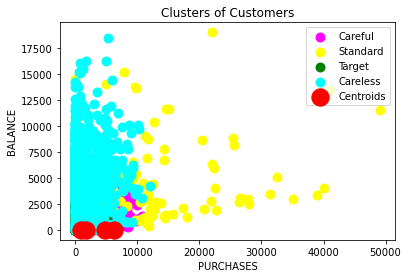

In [66]:
plt.scatter(data["PURCHASES"][labels[0]==0],          
            data["BALANCE"][labels[0]==0],s=80,c='magenta',label='Careful')
plt.scatter(data["PURCHASES"][labels[0] == 1],
           data["BALANCE"][labels[0] == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PURCHASES"][labels[0] == 2],
           data["BALANCE"][labels[0] == 2],s=80,c='green',label='Target')
plt.scatter(data["PURCHASES"][labels[0] == 3], 
           data["BALANCE"][labels[0] == 3],s=80,c='cyan',label='Careless')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show()